In [244]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
%matplotlib inline

Читаем данные для математиков и лингвистов

In [8]:
STUDENT_MAT = "student-mat.csv"
STUDENT_POR = "student-por.csv"
df_students_mat = pd.read_csv(STUDENT_MAT, sep=";", header=0)
df_students_por = pd.read_csv(STUDENT_POR, sep=";", header=0)

Добавляем признак специальности обучения

In [158]:
df_students_mat['spec'] = 1 # maths
df_students_por['spec'] = 0 # lingvo

In [43]:
print len(df_students_mat)
print len(df_students_por)

395
649


In [75]:
#df_students_mat.head()
print df_students_mat.columns.values.tolist()

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'spec']


In [76]:
#df_students_por.head()
print df_students_por.columns.values.tolist()

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'spec']


Объединяем наборы в один

In [159]:
df_students = pd.concat([df_students_mat, df_students_por])

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

Меняем бинарные строковые признаки на числовые (0 и 1)

In [160]:
df_students = df_students.applymap(lambda x: 1 if x == 'yes' else x)
df_students = df_students.applymap(lambda x: 0 if x == 'no' else x)
df_students = df_students.applymap(lambda x: 0 if x == 'F' else x)
df_students = df_students.applymap(lambda x: 1 if x == 'M' else x)
df_students = df_students.applymap(lambda x: 1 if x == 'T' else x)
df_students = df_students.applymap(lambda x: 0 if x == 'A' else x)
df_students = df_students.applymap(lambda x: 0 if x == 'GP' else x)
df_students = df_students.applymap(lambda x: 1 if x == 'MS' else x)
df_students = df_students.applymap(lambda x: 1 if x == 'U' else x)
df_students = df_students.applymap(lambda x: 0 if x == 'R' else x)

In [161]:
print df_students.head()
print df_students.columns.values.tolist()
print len(df_students)
#print len(df_students['romantic'])

   school  sex  age  address famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18        1     GT3        0     4     4  at_home   teacher   
1       0    0   17        1     GT3        1     1     1  at_home     other   
2       0    0   15        1     LE3        1     1     1  at_home     other   
3       0    0   15        1     GT3        1     4     2   health  services   
4       0    0   16        1     GT3        1     3     3    other     other   

   ...  freetime goout  Dalc  Walc  health  absences  G1  G2  G3  spec  
0  ...         3     4     1     1       3         6   5   6   6     1  
1  ...         3     3     1     1       3         4   5   5   6     1  
2  ...         3     2     2     3       3        10   7   8  10     1  
3  ...         2     2     1     1       5         2  15  14  15     1  
4  ...         3     2     1     2       5         4   6  10  10     1  

[5 rows x 34 columns]
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 

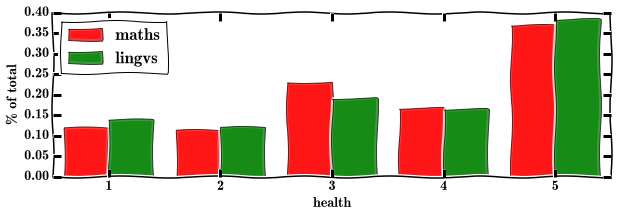

In [162]:
with plt.xkcd(): 
    plt.figure(figsize = (10, 10))
    plt.subplot(312)
    maths = df_students[df_students['spec'] == 1]['health'] 
    lingvs = df_students[df_students['spec'] == 0]['health']
    weights_math = np.ones_like(maths)/float(len(maths))
    weights_lingvs = np.ones_like(lingvs)/float(len(lingvs))
    plt.hist((maths, lingvs), bins = 5, color = ['r', 'g'], 
             weights = [weights_math, weights_lingvs], label=['maths', 'lingvs'], alpha=0.7)
    plt.xticks([1.4,2.2,3,3.8,4.6], [1,2,3,4,5])
    plt.legend(loc='upper left')
    plt.xlabel('health')
    plt.ylabel('% of total')
    plt.show()

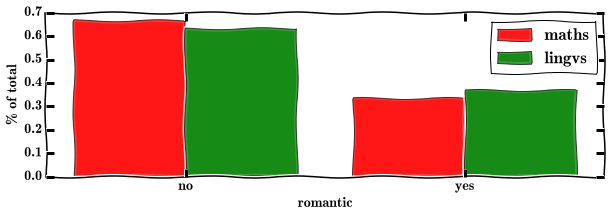

In [163]:
with plt.xkcd(): 
    plt.figure(figsize = (10, 10))
    plt.subplot(312)
    maths = df_students[df_students['spec'] == 1]['romantic'] 
    lingvs = df_students[df_students['spec'] == 0]['romantic']
    weights_math = np.ones_like(maths)/float(len(maths))
    weights_lingvs = np.ones_like(lingvs)/float(len(lingvs))
    plt.hist((maths, lingvs), bins = 2, color = ['r', 'g'], 
             weights = [weights_math, weights_lingvs], label=['maths', 'lingvs'], alpha=0.7)
    plt.xticks([0.25,0.75], ['no','yes'])
    plt.legend(loc='upper right')
    plt.xlabel('romantic')
    plt.ylabel('% of total')
    plt.show()

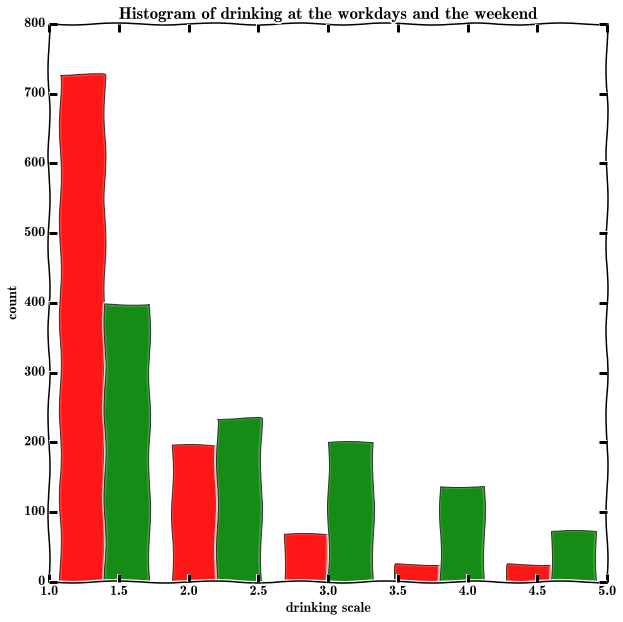

In [235]:
with plt.xkcd():
    plt.figure(figsize=(10,10))
    plt.hist((df_students["Dalc"],df_students["Walc"]), color = ['r','g'], bins = 5, alpha = 0.7)
    plt.title('Histogram of drinking at the workdays and the weekend')
    plt.xlabel('drinking scale')
    plt.ylabel('count')
    plt.show()

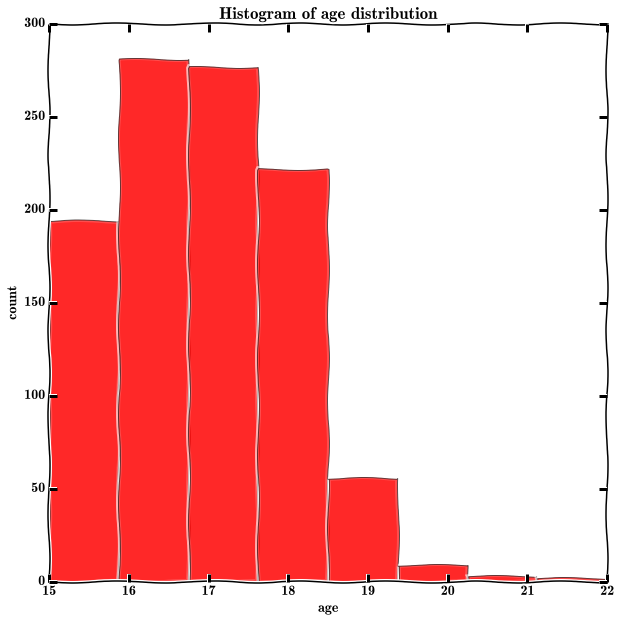

In [236]:
with plt.xkcd():
    plt.figure(figsize=(10,10))
    plt.hist((df_students["age"]), color = 'r', bins = 8, alpha = 0.6)
    plt.title('Histogram of age distribution')
    plt.xlabel('age')
    plt.ylabel('count')
    plt.show()

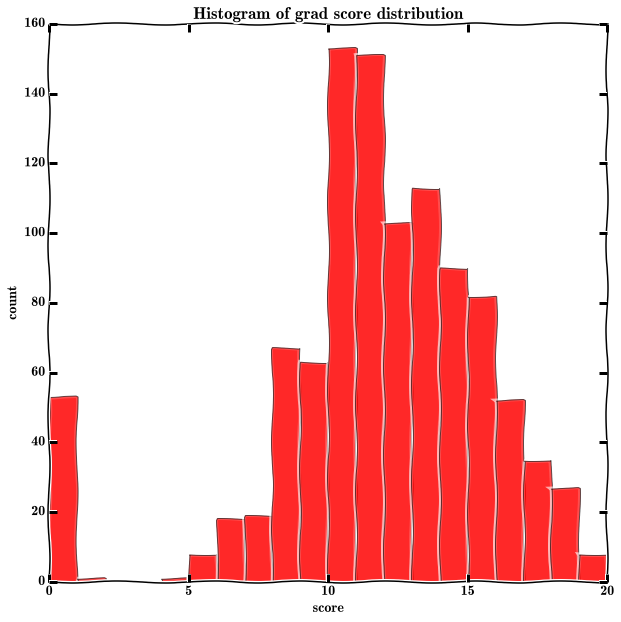

In [237]:
with plt.xkcd():
    plt.figure(figsize=(10,10))
    plt.hist((df_students["G3"]), color = "r", bins = 20, alpha = 0.6)
    plt.title('Histogram of grad score distribution')
    plt.xlabel('score')
    plt.ylabel('count')
    plt.show()

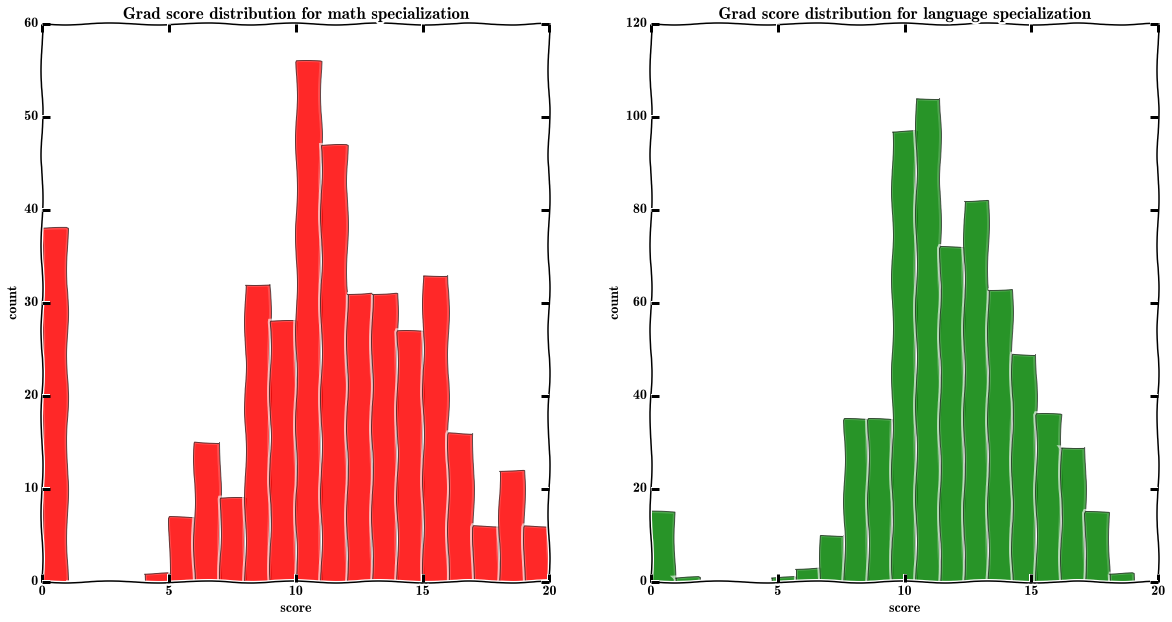

In [239]:
with plt.xkcd():
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('Grad score distribution for math specialization')
    plt.xlabel('score')
    plt.ylabel('count')
    plt.hist((df_students[df_students["spec"]== 1]["G3"]), color = "r", alpha = 0.6, bins = 20)
    plt.subplot(1, 2, 2)
    plt.title('Grad score distribution for language specialization')
    plt.xlabel('score')
    plt.ylabel('count')
    plt.hist((df_students[df_students["spec"]== 0]["G3"]), color = "g", alpha=0.6, bins = 20)
    plt.show()

Выберем признаки для подсчета корреляции

In [170]:
features = ['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 
           'failures', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 
           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Построим сокращенный датасет для подсчета матрицы корреляции

In [173]:
df_reduced = df_students[features]
df_spec = df_students['spec']
df_reduced.head()

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,4,4,2,2,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,1,1,1,1,2,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,2,3,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,4,2,1,3,0,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,1,3,3,1,2,0,...,4,3,2,1,2,5,4,6,10,10


Функция считает матрицу корреляции и находит пары признаков, корреляция между которыми больше bound

In [154]:
def find_correlated_features(x, features, bound):
    a = np.corrcoef(zip(*x))
    for i in xrange(len(features)):
        for j in xrange(i+1,len(features)):
            if abs(a[i][j]) > bound:
                print "%s + %s -> %f" % (features[i], features[j], abs(a[i][j]))

In [172]:
find_correlated_features(df_reduced.values, features, 0.25)

school + address -> 0.341657
school + traveltime -> 0.258834
sex + Dalc -> 0.275928
sex + Walc -> 0.302623
age + failures -> 0.282364
address + traveltime -> 0.343803
Medu + Fedu -> 0.642063
failures + higher -> 0.284893
failures + G1 -> 0.374175
failures + G2 -> 0.377172
failures + G3 -> 0.383145
higher + G1 -> 0.271476
higher + G2 -> 0.250619
freetime + goout -> 0.323556
goout + Dalc -> 0.253135
goout + Walc -> 0.399794
Dalc + Walc -> 0.627814
G1 + G2 -> 0.858739
G1 + G3 -> 0.809142
G2 + G3 -> 0.910743


Можно выделить следующие группы признаков:

    1. school, address, traveltime
    2. sex, Dalc, Walc, freetime, goout
    3. failures, age, higher, G1, G2, G3

Построим взаимные распределения пар признаков в каждой из групп, а также гистограмму значений каждого из признаков с учетом целевой переменной.

In [229]:
def plot_two_features_scatter(x_i, x_j, y, ax):
    
    x_pos = [x for i, x in enumerate(x_i) if y[i] == 1]
    y_pos = [x for i, x in enumerate(x_j) if y[i] == 1]
    x_neg = [x for i, x in enumerate(x_i) if y[i] == 0]
    y_neg = [x for i, x in enumerate(x_j) if y[i] == 0]
    N = 50
    if len(x_pos) < len(x_neg):
        for i in range(0, len(x_pos)/N + 1):
            ax.scatter(x_pos[i*N:(i+1)*N], y_pos[i*N:(i+1)*N], c='r', alpha=0.5, s=100)
            ax.scatter(x_neg[i*N:(i+1)*N], y_neg[i*N:(i+1)*N], c='g', alpha=0.5, s=100)
        ax.scatter(x_neg[len(x_pos)], y_neg[len(x_pos)], c='g', alpha=0.5, s=100)
    else:
        for i in range(0, len(x_neg)/N + 1):
            ax.scatter(x_pos[i*N:(i+1)*N], y_pos[i*N:(i+1)*N], c='r', alpha=0.5, s=100)
            ax.scatter(x_neg[i*N:(i+1)*N], y_neg[i*N:(i+1)*N], c='g', alpha=0.5, s=100)
        ax.scatter(x_pos[len(x_neg)], y_pos[len(x_neg)], c='g', alpha=0.5, s=100)
    
def plot_feature_histogram(x_i, y, ax):
    x_i = x_i[np.isfinite(x_i)]
    x_i_pos = [x for i, x in enumerate(x_i) if y[i] == 1]
    x_i_neg = [x for i, x in enumerate(x_i) if y[i] == 0]
    
    ax.hist([x_i_pos, x_i_neg], color=['red', 'green'], alpha=0.8)

def plot_dataset(x, y, features):
    f, ax = plt.subplots(len(features), len(features), figsize=(15,15))
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            
            ax[i][j].axes.get_xaxis().set_ticks([0])
            ax[i][j].axes.get_yaxis().set_ticks([0])
            if i == 0:
                ax[0][j].set_title(features[j])
            if j == 0:
                ax[i][0].set_ylabel(features[i])
            # Do actual plotting
            if i != j:
                plot_two_features_scatter(x[:, j], x[:, i], y, ax[i][j])
            else:
                #pass
                plot_feature_histogram(x[:, i], y, ax[i][j])
    
    plt.show()

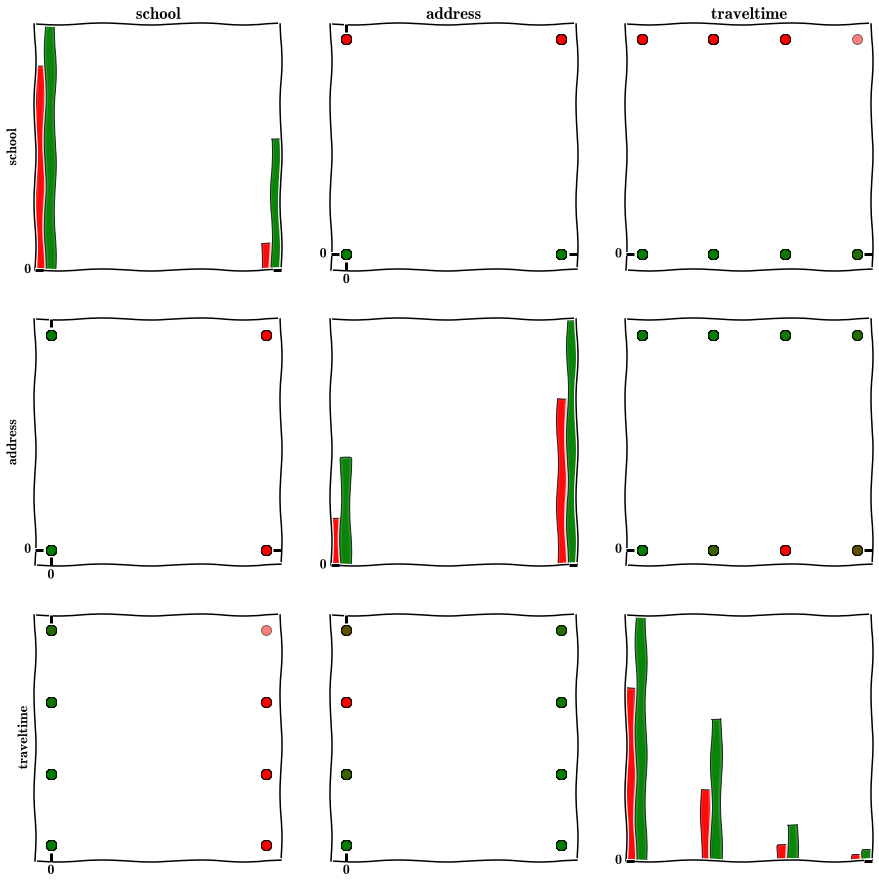

In [231]:
features_1 = ['school', 'address', 'traveltime']
with plt.xkcd(): 
    plot_dataset(df_students[features_1].values, df_spec.values, features_1)

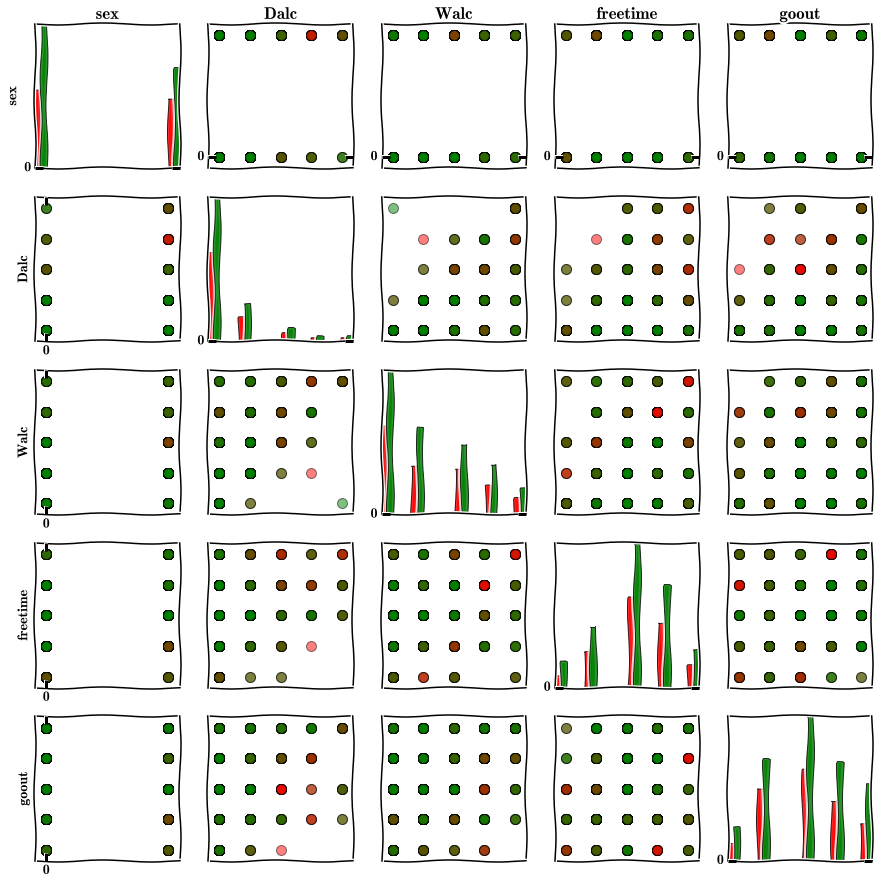

In [232]:
features_2 = ['sex', 'Dalc', 'Walc', 'freetime', 'goout']
with plt.xkcd(): 
    plot_dataset(df_students[features_2].values, df_spec.values, features_2)

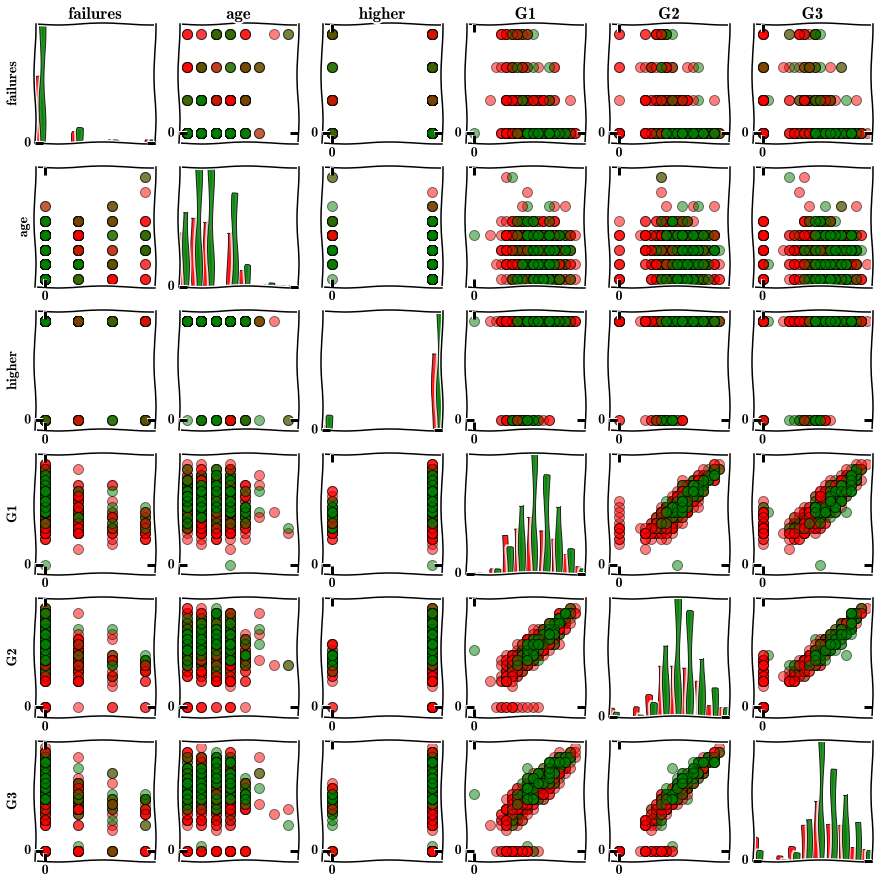

In [233]:
features_3 = ['failures', 'age', 'higher', 'G1', 'G2', 'G3']
with plt.xkcd(): 
    plot_dataset(df_students[features_3].values, df_spec.values, features_3)

In [240]:
group_grad = df_students.groupby(['Walc','G3']).agg(['count']).reset_index()

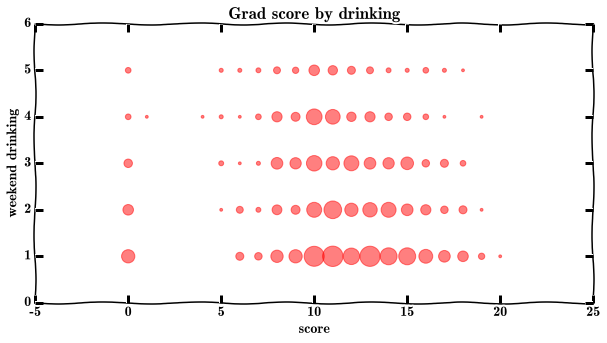

In [241]:
with plt.xkcd():
    plt.figure(figsize=(10,5))
    plt.scatter(group_grad['G3'], group_grad['Walc'] , s=8*group_grad['age'], color='r', alpha=0.5)
    plt.title('Grad score by drinking')
    plt.xlabel('score')
    plt.ylabel('weekend drinking')
    plt.show()

In [242]:
group_health = df_students.groupby(['Walc','health']).agg(['count']).reset_index()

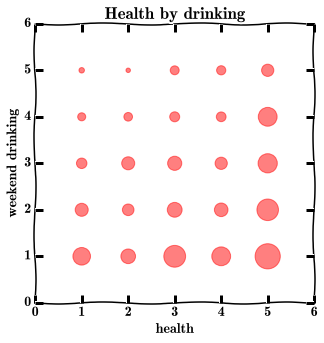

In [243]:
with plt.xkcd():
    plt.figure(figsize=(5,5))
    plt.scatter(group_health['health'], group_health['Walc'] , s=5*group_health['age'], color='r', alpha=0.5)
    plt.title('Health by drinking')
    plt.xlabel('health')
    plt.ylabel('weekend drinking')
    plt.show()

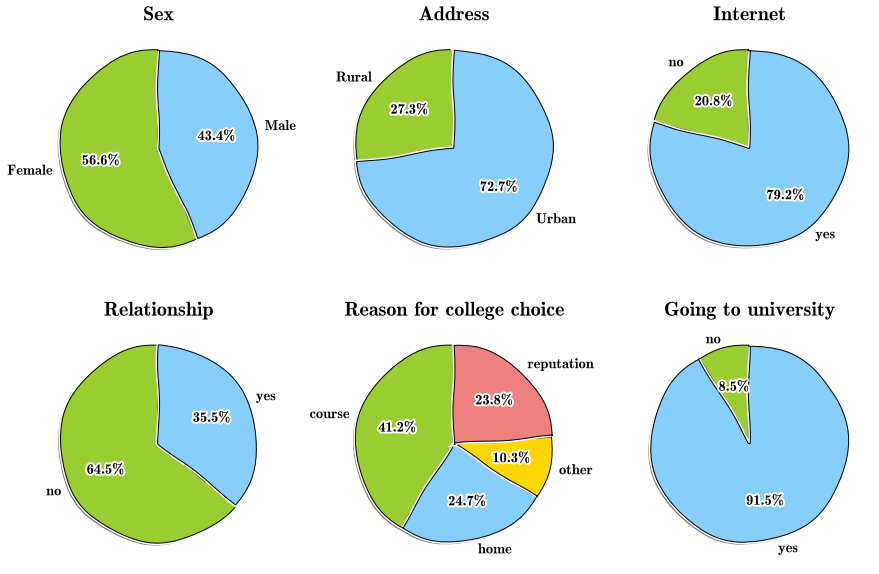

In [249]:
with plt.xkcd():
    
    proptease = fm.FontProperties()
    proptease.set_size('x-large')
    
    plt.figure(figsize=(15,15))
    
    colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightcoral']
    
    plt.subplot(331)
    plt.title('Sex', fontsize = 20)
    group_sex = df_students.groupby('sex').agg(['count']).reset_index()
    sizes =np.array(group_sex['age'])
    labels = ['Female','Male']
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)
    
    
    plt.subplot(332)
    plt.title('Address', fontsize = 20)
    group_add = df_students.groupby('address').agg(['count']).reset_index()
    sizes =np.array(group_add['age'])
    labels = ['Rural','Urban']
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)
    
    
    
    plt.subplot(333)
    plt.title('Internet', fontsize = 20)
    group_int = df_students.groupby('internet').agg(['count']).reset_index()
    sizes =np.array(group_int['age'])
    labels = ['no', 'yes']
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)
    
    
    plt.subplot(334)
    plt.title('Relationship', fontsize = 20)
    group_r = df_students.groupby('romantic').agg(['count']).reset_index()
    sizes =np.array(group_r['age'])
    labels = ['no', 'yes']
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    
    plt.subplot(335)
    plt.title('Reason for college choice', fontsize = 20)
    group_reas = df_students.groupby('reason').agg(['count']).reset_index()
    sizes =np.array(group_reas['age'])
    labels = np.array(group_reas['reason'])
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)
    
    
    plt.subplot(336)
    
    plt.title('Going to university', fontsize = 20)
    group_h = df_students.groupby('higher').agg(['count']).reset_index()
    sizes =np.array(group_h['age'])
    labels = ['no', 'yes']
    patches, texts, autotexts = plt.pie(sizes,autopct='%1.1f%%', labels=labels, shadow=True,startangle=90, colors= colors)

    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)